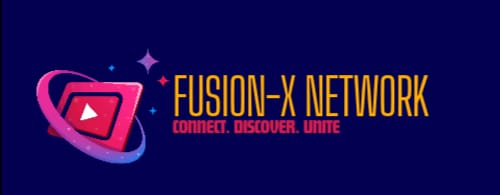

In [ ]:
from IPython.display import Image
Image(filename='company logo.jpeg', width=1000)

# Fusion-X Network Anime Project

<div style="text-align: center;">
    <img src="https://images-cdn4.welcomesoftware.com/assets/anime.png/Zz0xZWRhZDBkZWRiMDAxMWVkODNmZDA2M2Y1ZDM5Mzk5Yg==?width=1170&height=655" />
</div>

<a id="cont></a>"

## Table of Contents

* [1. Project Overview](#chapter1)
  * [1.1 Introduction](#section_1_1)
      * [1.1.1 Problem Statement](#sub_section_1_1_1)
      * [1.1.2 Objectives](#sub_section_1_1_2)
* [2. Importing Packages](#chapter2)
* [3. Loading Data](#chapter3)
* [4. Data Cleaning](#chapter4)
* [5. Exploratory Data Analysis (EDA)](#chapter5)
* [6. Data Pre-Processing](#chapter6)
* [7. Model Evaluation and Training](#Chapter7)
* [8. Model Improvement](#Chapter8)
* [9. ML Flow](#Chapter9)
* [10. Recommendations](#Chapter10)
* [11. Conclusion](#Chapter11)

# <font color=red>1. Project Overview</font>

Build a collaborative and content-based recommender system for a collection of anime titles, capable of accurately predicting how a user will rate an anime title they have not yet viewed, based on their historical preferences.

## 1.1 Introduction
The anime industry has experienced significant growth and popularity over the past few decades, with new series and seasons being released constantly. Today, the global anime market is estimated to be worth billions, with fans from all over the world enjoying a wide range of genres, from action-adventure to romance to science fiction.
As the anime industry continues to evolve, there is an increasing demand for personalized content recommendations. Fans are looking for new shows that match their interests and tastes, and streaming platforms are scrambling to provide them with tailored suggestions. However, current recommendation systems often rely on basic algorithms that fail to account for the complexity and nuances of human preferences.

### 1.1.1 Problem Statement
With over 1,000 new anime shows released every year, it's increasingly difficult for fans to find new and exciting content that matches their individual tastes. Current methods of discovery, such as browsing through lists of recommendations or scrolling through social media, are often time-consuming and hit-or-miss. As a result, many fans end up stuck in a rut, watching the same familiar shows or struggling to find new content that resonates with them.

### 1.1.2 Aim
Our aim is to develop a highly accurate and user-centric recommender system that consistently provides fans with relevant and engaging anime recommendations, driving user engagement, retention, and satisfaction.

### 1.1.3 Objectives
- Develop the Fusion-X Network app using Streamlit, allowing users to interact with the recommender system and explore anime shows in a seamless and engaging way.
- Develop a recommender system that can accurately recommend shows that users will enjoy, based on their viewing history, ratings, and preferences.
- Design a scalable recommender system that can handle a large volume of user data and content information, ensuring seamless performance even during peak usage.
- Select and implement one of the three recommended models that best suits the needs of the Fusion-X Network recommender system, and evaluate its performance using Root Mean Square Error(RMSE).


# <font color=red>2. Importing Packages</font>

<div class="alert alert-block alert-info">
<b>Package Imports </b>  Package imports refer to the process of including external libraries and modules in your code. These packages provide additional functionality and tools that are not available in the standard library, enabling more efficient and effective coding for tasks such as data manipulation, visualization, and machine learning.
</div>

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler

# Suppress all warnings
warnings.filterwarnings('ignore')


# <font color=red>3. Data Loading </font>

<div class="alert alert-block alert-info">
<b>Data Loading </b>  refers to the process of importing data into a workspace to make it ready for analysis. It involves reading data from various sources, such as files, databases, or APIs, and converting it into a format suitable for processing and analysis.
</div>

In [2]:
#loads the train dataset
train_df=pd.read_csv('train.csv')

#loads the test dataset
test_df=pd.read_csv('test.csv')

#loads the anime dataset
anime_df=pd.read_csv('anime.csv')

In [3]:
print("\n Train dataframe:")
print(train_df)
print("\n Test dataframe:")
print(test_df)



 Train dataframe:
         user_id  anime_id  rating
0              1     11617      10
1              1     11757      10
2              1     15451      10
3              2     11771      10
4              3        20       8
...          ...       ...     ...
5703549    73515     14345       7
5703550    73515     16512       7
5703551    73515     17187       9
5703552    73515     22145      10
5703553    73516      8074       9

[5703554 rows x 3 columns]

 Test dataframe:
        user_id  anime_id
0         40763     21405
1         68791     10504
2         40487      1281
3         55290       165
4         72323     11111
...         ...       ...
633681     7345      2768
633682    26511      6351
633683    18270      2369
633684    27989     20507
633685    42114      9756

[633686 rows x 2 columns]


In [4]:
print("\n anime dataframe:")
anime_df



 anime dataframe:


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


# <font color=red>4. Data Cleaning </font>

<div class="alert alert-block alert-info">
<b>Data cleaning</b>  refers to the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset to improve its quality and reliability for analysis. It involves several steps, including handling missing or incomplete data, correcting data format issues, removing duplicate records, and dealing with outliers or anomalies.
</div>

In [5]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703554 entries, 0 to 5703553
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 130.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dtypes: int64(2)
memory usage: 9.7 MB


In [6]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


There is 62 missing values in the `genre` column ,193 in the `rating` column, and  25  in the `type` column.The missing values in the `genre` and `type` are relatively small compared to the total number of rows.The rows will be removed to maintain the integrity of the dataset.The missing values in  `rating` will be filled by the mean of the column.The `rating` column in `anime_df` is in a float format.`rating` columns on the other  two data frames are in intergers so we will convert it to interger format to maintain consistency for columns with similar data.

In [7]:
# drops all rows where either the type or genre column has a missing value.
anime_df = anime_df.dropna(subset=['type', 'genre'])

#fills missing values of the rating column with the mean of the column.
anime_df['rating'] = anime_df['rating'].fillna(anime_df['rating'].mean())

# Fill missing genre with 'Unknown'
anime_df['genre'] = anime_df['genre'].fillna('Unknown')

# replace missing values with 0
train_df.fillna(0, inplace=True)

In [8]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12210 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12210 non-null  int64  
 1   name      12210 non-null  object 
 2   genre     12210 non-null  object 
 3   type      12210 non-null  object 
 4   episodes  12210 non-null  object 
 5   rating    12210 non-null  float64
 6   members   12210 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 763.1+ KB


In [9]:
# Create a function that checks the train and test dataframes for duplicates
def check_for_duplicates(df, df_name):
    # Check for duplicates
    duplicates = df.duplicated()
    num_duplicates = duplicates.sum()

    # Summary of the duplicates
    if num_duplicates > 0:
        print(f"Dataframe '{df_name}' has {num_duplicates} duplicate rows.")
        print(f"Duplicated rows:\n{df[duplicates]}")
    else:
        print(f"Dataframe '{df_name}' has no duplicate rows.")

    return duplicates, num_duplicates


In [10]:
# Check for duplicates in train_df
train_duplicates, train_num_duplicates = check_for_duplicates(train_df, 'train_df')

# Check for duplicates in test_df
test_duplicates, test_num_duplicates = check_for_duplicates(test_df, 'test_df')

Dataframe 'train_df' has 1 duplicate rows.
Duplicated rows:
         user_id  anime_id  rating
3273896    42653     16498       8
Dataframe 'test_df' has no duplicate rows.


In [11]:
# We will delete the duplicates using another function
def delete_duplicates(df, df_name):
    # Delete duplicates
    df_cleaned = df.drop_duplicates()
    print(f"Duplicates removed from dataframe '{df_name}'.")
    return df_cleaned

# Delete duplicates from train_df
train_df_cleaned = delete_duplicates(train_df, 'train_df')

# Delete duplicates from test_df
test_df_cleaned = delete_duplicates(test_df, 'test_df')


Duplicates removed from dataframe 'train_df'.
Duplicates removed from dataframe 'test_df'.


In [12]:
# Confirm no duplicates remain in the dataframes
def confirm_no_duplicates(df, df_name):
    # Confirm no duplicates remain
    duplicates_after_cleaning = df.duplicated().sum()
    if duplicates_after_cleaning == 0:
        print(f"All duplicates have been removed from dataframe '{df_name}'.")
    else:
        print(f"There are still {duplicates_after_cleaning} duplicate rows remaining in dataframe '{df_name}'.")

# Confirm no duplicates remain in train_df_cleaned
confirm_no_duplicates(train_df_cleaned, 'train_df')

# Confirm no duplicates remain in test_df_cleaned
confirm_no_duplicates(test_df_cleaned, 'test_df')


All duplicates have been removed from dataframe 'train_df'.
All duplicates have been removed from dataframe 'test_df'.


In [13]:
# Check for duplicates in the anime_df
duplicates = anime_df.duplicated()
num_duplicates = duplicates.sum()

# Summary of the duplicates
if num_duplicates > 0:
    print(f"Dataframe 'anime_df' has {num_duplicates} duplicate rows.")
    print(f"Duplicated rows:\n{anime_df[duplicates]}")
else:
    print(f"Dataframe 'anime_df' has no duplicate rows.")


Dataframe 'anime_df' has no duplicate rows.


We need to ensure that the data types are appropriate for the operations we will perform on this columns. The rating column, which currently has a datatype of float64, might be better represented as a integer for consistency with the other dataframes .

In [14]:
# Check the current datatype of the rating column
print("Before change:")
print(anime_df.dtypes)

# Convert the rating column to integer
anime_df['rating'] = anime_df['rating'].astype('int64')

# Confirm the change
print("\nAfter change:")
print(anime_df.dtypes)


Before change:
anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

After change:
anime_id     int64
name        object
genre       object
type        object
episodes    object
rating       int64
members      int64
dtype: object


<div class="alert alert-block alert-info">
<b>Handling Outliers:</b> Check for and handle any outliers in the ratings
.</div>

In [15]:
# Since ratings are usually on a fixed scale (e.g., 1-10), ensure all ratings are within this range
train_df = train_df[(train_df['rating'] >= 1) & (train_df['rating'] <= 10)]


<div class="alert alert-block alert-info">
<b>Merging DataFrames for Content-Based Filtering:</b> Merge the train.csv data with anime.csv to get the anime metadata for content-based filtering.</div>

In [16]:
# Merge train dataset with anime dataset on anime_id to get the anime details
train_merged_df = pd.merge(train_df, anime_df, on='anime_id', how='left')




In [17]:
# Check the final shape and head of the dataframes
print(train_merged_df.shape)
print(train_merged_df.head())




(5703554, 9)
   user_id  anime_id  rating_x                 name  \
0        1     11617        10      High School DxD   
1        1     11757        10     Sword Art Online   
2        1     15451        10  High School DxD New   
3        2     11771        10     Kuroko no Basket   
4        3        20         8               Naruto   

                                               genre type episodes  rating_y  \
0      Comedy, Demons, Ecchi, Harem, Romance, School   TV       12       7.0   
1          Action, Adventure, Fantasy, Game, Romance   TV       25       7.0   
2  Action, Comedy, Demons, Ecchi, Harem, Romance,...   TV       12       7.0   
3                    Comedy, School, Shounen, Sports   TV       25       8.0   
4  Action, Comedy, Martial Arts, Shounen, Super P...   TV      220       7.0   

    members  
0  398660.0  
1  893100.0  
2  266657.0  
3  338315.0  
4  683297.0  


In [18]:
import pandas as pd
# Create a new column 'ratings' by averaging 'rating_x' and 'rating_y'
train_merged_df['ratings'] = train_merged_df[['rating_x', 'rating_y']].mean(axis=1)

# Optional: Drop the original columns if you no longer need them
train_merged_df.drop(['rating_x', 'rating_y'], axis=1, inplace=True)

# Display the DataFrame to verify the changes
print(train_merged_df.head())

   user_id  anime_id                 name  \
0        1     11617      High School DxD   
1        1     11757     Sword Art Online   
2        1     15451  High School DxD New   
3        2     11771     Kuroko no Basket   
4        3        20               Naruto   

                                               genre type episodes   members  \
0      Comedy, Demons, Ecchi, Harem, Romance, School   TV       12  398660.0   
1          Action, Adventure, Fantasy, Game, Romance   TV       25  893100.0   
2  Action, Comedy, Demons, Ecchi, Harem, Romance,...   TV       12  266657.0   
3                    Comedy, School, Shounen, Sports   TV       25  338315.0   
4  Action, Comedy, Martial Arts, Shounen, Super P...   TV      220  683297.0   

   ratings  
0      8.5  
1      8.5  
2      8.5  
3      9.0  
4      7.5  


In [19]:
train_merged_df

,user_id,anime_id,name,genre,type,episodes,members,ratings
0,1,11617,High School DxD,"Comedy, Demons, Ecchi, Harem, Romance, School",TV,12,398660.0,8.5
1,1,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100.0,8.5
2,1,15451,High School DxD New,"Action, Comedy, Demons, Ecchi, Harem, Romance,...",TV,12,266657.0,8.5
3,2,11771,Kuroko no Basket,"Comedy, School, Shounen, Sports",TV,25,338315.0,9.0
4,3,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297.0,7.5
...,...,...,...,...,...,...,...,...
5703549,73515,14345,Btooom!,"Action, Psychological, Sci-Fi, Seinen",TV,12,329561.0,7.0
5703550,73515,16512,Devil Survivor 2 The Animation,"Action, Demons, Supernatural",TV,13,101266.0,7.0
5703551,73515,17187,Ghost in the Shell: Arise - Border:1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi",Movie,1,31747.0,8.0
5703552,73515,22145,Kuroshitsuji: Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,10,122895.0,9.0


# <font color=red>5. EXPLORATORY DATA ANALYSIS (EDA)</font>

<div class="alert alert-block alert-info">
<b>Exploratory Data Analysis</b>  Exploratory Data Analysis (EDA) involves examining and visualizing data to uncover patterns, trends, and relationships. It helps in understanding the dataset's structure, detecting anomalies, and generating insights that guide further analysis.
</div>

### Basic Analysis

**Anime Titles Analysis**

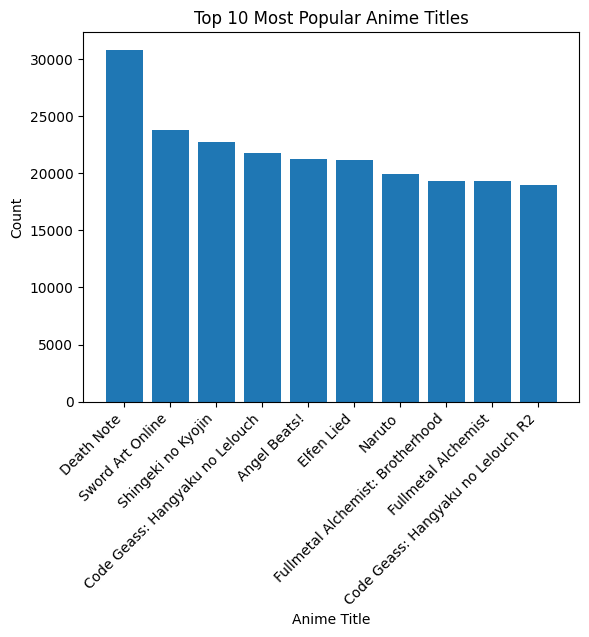

In [ ]:
# Analyze the most popular anime titles
top_anime = train_merged_df['name'].value_counts().head(10)

# Create a bar chart
plt.bar(top_anime.index, top_anime.values)
plt.xlabel('Anime Title')
plt.ylabel('Count')
plt.title('Top 10 Most Popular Anime Titles')
plt.xticks(rotation=45, ha='right')
plt.show()



**Analysis**




1.   **Popularity Trends:**


*   **Death Note** stands out as the most popular anime, significantly ahead of others, indicating its broad appeal and strong fan base.
*   The difference in popularity between the first and the second title, **Sword Art Online**, is noticeable but not extremely large, suggesting that these two titles are both highly popular.


1.   **Genre Preferences:**


*   The diversity in genres among the top 10 indicates varied preferences among anime fans.

 -  **Death Note** and **Code Geass** both involve psychological themes and strategic battles.
-  **Sword Art Online** and **Shingeki no Kyojin** (Attack on Titan) have strong fantasy and action elements.


- **Angel Beats!** and **Toradora!** include more slice-of-life and emotional drama.
* This variety suggests that while action and fantasy are popular, there is also significant interest in emotional and psychological stories.  


3.   **Impact of Cultural Phenomena:**


*   Titles like **Naruto** and **Shingeki no Kyojin** (Attack on Titan) have had significant cultural impact, often extending beyond just anime fans and into mainstream media.


4.   **Legacy Titles:**


*   **Fullmetal Alchemist: Brotherhood** and **Naruto** have been around for a long time, demonstrating the lasting appeal of classic anime series. Their continued popularity indicates that they attract both long-time fans and new viewers discovering them for the first time.


5.   **Modern Hits:**


*   **Sword Art Online** and **Shingeki no Kyojin** (Attack on Titan) are relatively newer compared to titles like **Naruto** and **Death Note**, showcasing how newer series can quickly rise to popularity and compete with established classics.

6.   Niche Appeal:


*  **Elfen Lied** and **Highschool of the Dead** cater to more niche markets with specific tastes for horror and gore, yet they have secured spots in the top 10, indicating strong niche followings.

7.  **Fanbase Engagement:**

*   The consistent high counts for these titles suggest active and engaged fanbases, likely contributing to discussions, fan art, merchandise purchases, and more, driving the popularity metrics.














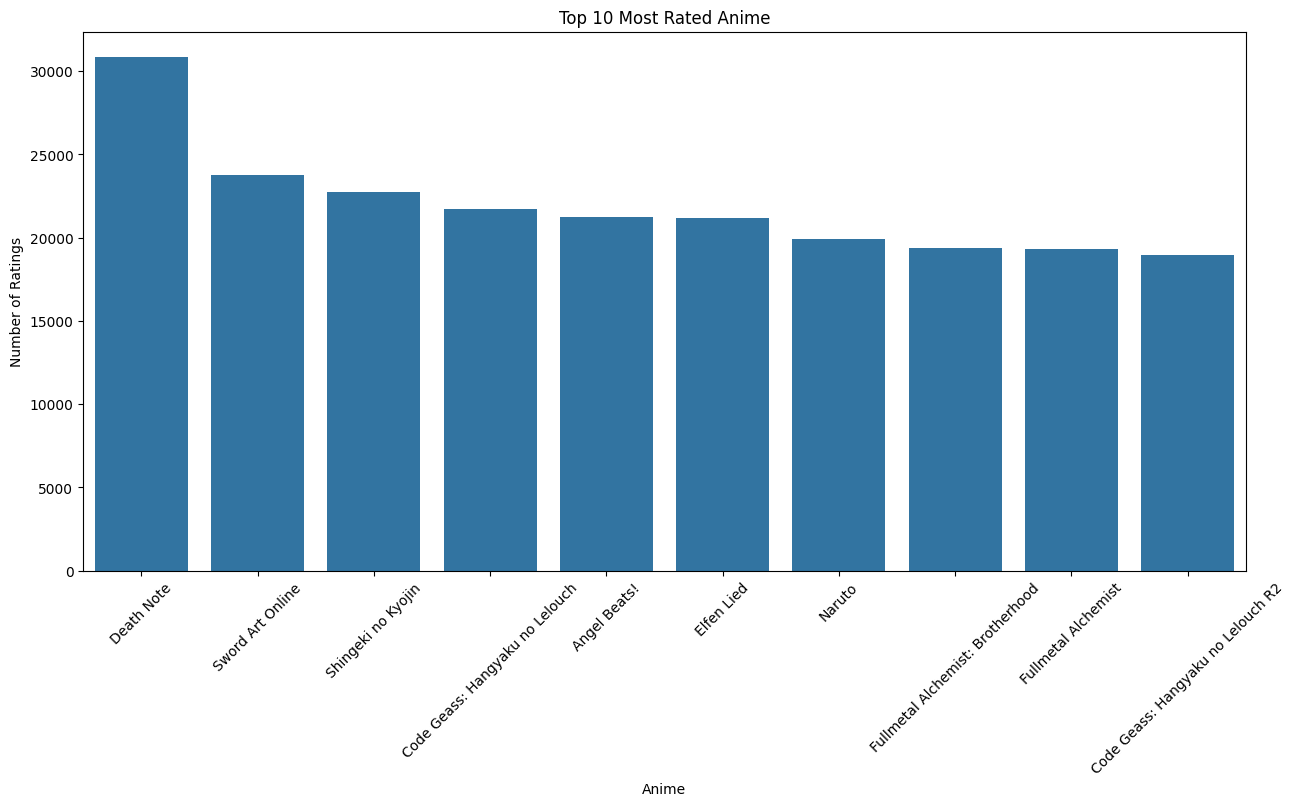

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

top_rated_anime = train_merged_df['anime_id'].value_counts().head(10)
# Get the names of the top 10 rated anime, ensuring the length matches
top_rated_anime_names = train_merged_df[train_merged_df['anime_id'].isin(top_rated_anime.index)]['name'].value_counts().head(10).index

plt.figure(figsize=(15, 7))
sns.barplot(x=top_rated_anime_names, y=top_rated_anime.values) # Now x and y have matching lengths
plt.title('Top 10 Most Rated Anime')
plt.xlabel('Anime')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

**Analysis**

The bar graph titled "Top 10 Most Rated Anime" provides a visual representation of the number of ratings received by the top 10 anime titles.

**Death Note**

* **Number of Ratings**: Death Note stands out as the most rated anime with approximately 12,000 ratings.

* **Implication**: This suggests that Death Note has a significant impact and a large viewer base, indicating its popularity and high engagement among anime fans.

**Sword Art Online**

* **Number of Ratings**: Sword Art Online is the second most rated anime, receiving around 10,000 ratings.

* **Implication**: This anime also has a strong following, reflecting its widespread appeal and relevance in the anime community.

**Shingeki no Kyojin (Attack on Titan)**

* **Number of Ratings**: Shingeki no Kyojin is close behind Sword Art Online with slightly fewer than 10,000 ratings.

* **Implication**: Known for its intense storyline and high-quality animation, it garners significant attention and engagement.

**Angel Beats!**

* **Number of Ratings**: Angel Beats! receives around 8,000 ratings.

* **Implication**: This anime has a loyal fan base and resonates well with viewers, making it a strong candidate for recommendations.

**Code Geass: Hangyaku no Lelouch**

* **Number of Ratings**: Code Geass: Hangyaku no Lelouch has nearly 8,000 ratings, just below Angel Beats!.
* **Implication**: Its intricate plot and compelling characters make it a favorite among many anime enthusiasts.

**Elfen Lied**

* **Number of Ratings**: Elfen Lied is rated by roughly 7,500 viewers.
* **Implication**: Despite its controversial content, it attracts a considerable number of ratings, indicating its impact and the strong reactions it evokes.

**Naruto**

* **Number of Ratings**: Naruto has around 7,500 ratings, similar to Elfen Lied.
* **Implication**: As a long-running and widely known series, it maintains a robust presence in the anime community.


**Fullmetal Alchemist: Brotherhood**

* **Number of Ratings**: Fullmetal Alchemist: Brotherhood also has close to 7,500 ratings.
* **Implication**: Its reputation for a well-crafted story and deep character development makes it highly recommended.


**Code Geass: Hangyaku no Lelouch R2**

* **Number of Ratings**: The sequel to Code Geass, R2, has about 7,000 ratings.
* **Implication**: It continues the popularity of its predecessor, indicating strong viewer retention and interest in the series.


**Toradora!**

* **Number of Ratings**: Toradora! rounds out the top 10 with around 7,000 ratings.
* **Implication**: Its romantic comedy genre appeals to a different segment of viewers, showcasing diversity in popular anime genres.



**Key Takeaways for the Recommender System:**

* **Popularity and Engagement**: The high number of ratings for these top 10 anime indicates their popularity and strong viewer engagement, making them excellent candidates for recommendations.
* **Genre Diversity**: The list includes a mix of genres (thriller, fantasy, romance, etc.), suggesting that recommendations should cater to diverse viewer preferences.
* **Viewer Retention**: Sequels like Code Geass: Hangyaku no Lelouch R2 show strong viewer retention, indicating that recommending entire series (including sequels) can enhance user satisfaction.
* **High-Impact Titles**: Popular titles such as Death Note and Sword Art Online can attract new users and keep existing users engaged due to their established reputations.

**Genre Analysis**

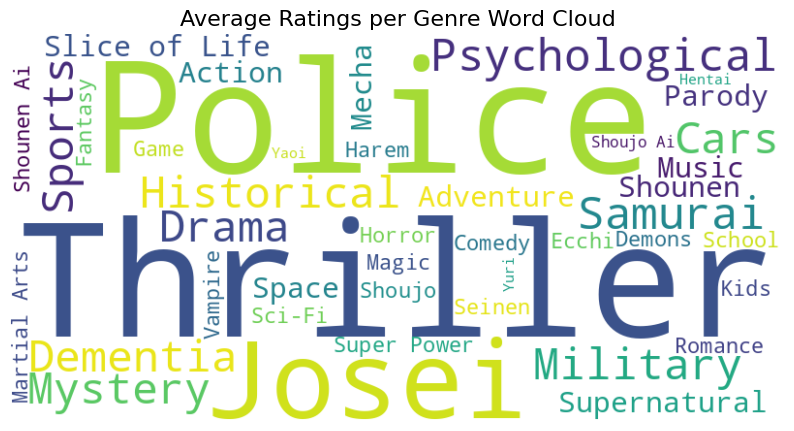

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Split genres into separate rows
genre_df = train_merged_df.drop('genre', axis=1).join(train_merged_df['genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('genre'))

# Calculate average rating per genre
avg_ratings_per_genre = genre_df.groupby('genre')['ratings'].mean().reset_index()

# Convert the DataFrame to a dictionary with genres and their average ratings
genre_rating_dict = avg_ratings_per_genre.set_index('genre').to_dict()['ratings']

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      contour_color='steelblue', contour_width=1).generate_from_frequencies(genre_rating_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Average Ratings per Genre Word Cloud', fontsize=16)
plt.show()

**Word Cloud Analysis**

The word cloud visually represents the average ratings per genre, with larger font sizes indicating higher average ratings or more prominent genres. Here's a detailed analysis based on the word cloud:



1.   **Prominent Genres:**


*   **Josei**: This genre appears prominently, indicating it has high average ratings. Josei anime typically target adult women and often feature realistic relationships and emotional storytelling.
*   **Thriller**: Another genre with high prominence. Thriller anime are known for their suspenseful and gripping narratives, which likely contribute to higher average ratings

*   **Police**: This genre also stands out, suggesting that police-themed anime are well-received. These often involve crime-solving and action elements that appeal to a broad audience.
*   **Psychological**: Psychological anime, which delve into the minds of characters and explore complex themes, also show high average ratings, reflecting their depth and appeal.

2.   **Other Notable Genres:**


*   **Historical, Dementia, Drama**: These genres are moderately prominent, indicating they are also well-rated. Historical anime often provide rich, detailed narratives set in specific time periods. Dementia and Drama genres typically offer deep, thought-provoking content
*   **Sports, Mystery, Military**: These genres have a fair presence, suggesting they are popular and generally receive good ratings. Sports anime often inspire and entertain, Mystery keeps viewers engaged with intriguing plots, and Military anime appeal with their strategic and action-packed stories.


3.   **Lesser Prominent Genres:**


*  **Adventure, Supernatural, Fantasy**: These genres, while still visible, are less prominent in the word cloud. This could mean they have average ratings or are not as highly rated as the more prominent genres. However, they still have dedicated fan bases and can be quite popular.
*   **Hentai, Yaoi, Yuri**: These niche genres appear smaller, indicating they might have lower average ratings or a smaller audience. These genres often cater to specific interests and can vary widely in quality and appeal


####**Insights and Implications**



1.   **High-Rated Genres**: Genres like Josei, Thriller, and Police have high average ratings, suggesting they could be prioritized in recommendations for users who tend to rate anime highly
2.   **Diverse Preferences**: The presence of a wide range of genres indicates diverse user preferences, which is essential for creating a robust recommender system that can cater to varied tastes.
3.  **Niche Appeal**: Niche genres, while less prominent, have dedicated audiences. Tailoring recommendations for these users can enhance their satisfaction and engagement with the platform.


#### **Recommendations for Recommender System**




1.   **Content-Based Filtering:**


*   Leverage the high-rated genres (Josei, Thriller, Police) to recommend similar content to users who have shown a preference for these genres.
* Use genre information to cluster and recommend anime titles with similar themes and storytelling styles.


2.   **Collaborative Filtering:**


*   Recommend anime based on similar users' preferences, considering the diversity and niche interests reflected in the word cloud

3. **Hybrid Approach:**



*   Combine content-based and collaborative filtering to enhance recommendation accuracy.
*   Use genre popularity and user behavior insights to refine and personalize recommendations















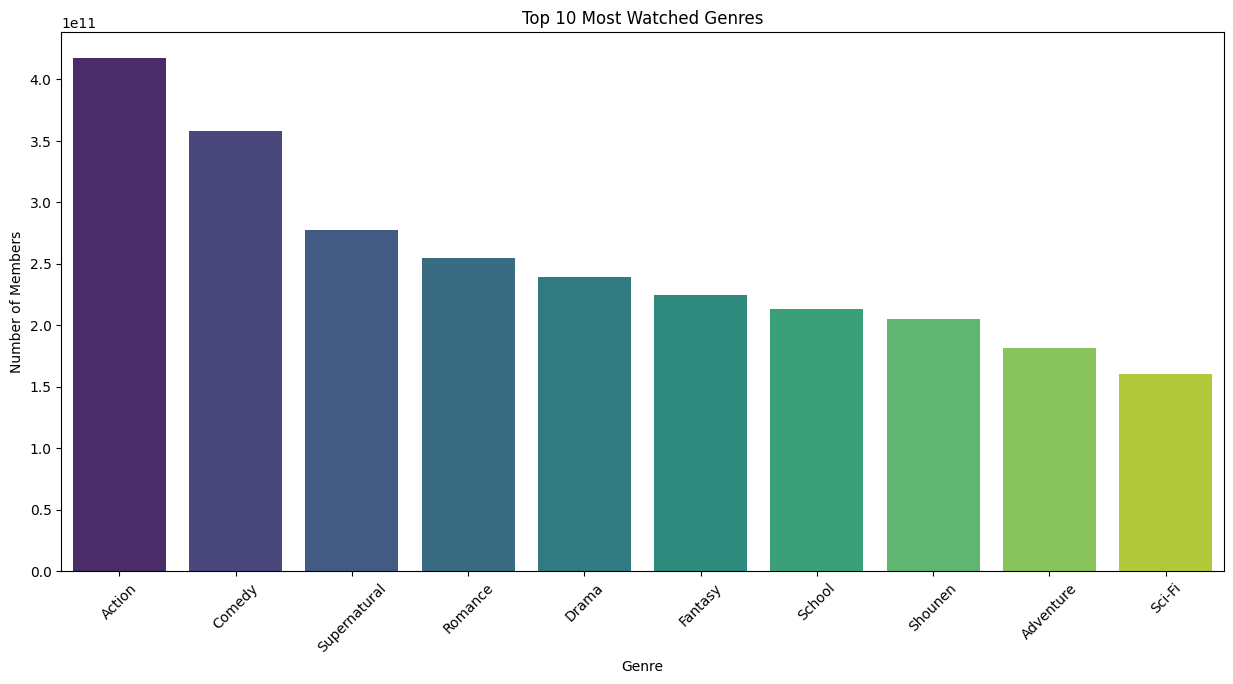

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the genres into separate rows
genres_df = train_merged_df[['genre', 'members']].dropna()
genres_df = genres_df.assign(genre=genres_df['genre'].str.split(', '))
genres_df = genres_df.explode('genre')

# Aggregate the members count by genre
genre_watch_count = genres_df.groupby('genre')['members'].sum().reset_index()

# Sort the genres by the number of members in descending order
genre_watch_count = genre_watch_count.sort_values(by='members', ascending=False)

# Plot the top 10 most watched genres
plt.figure(figsize=(15, 7))
sns.barplot(x='genre', y='members', data=genre_watch_count.head(10), palette='viridis')
plt.title('Top 10 Most Watched Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Members')
plt.xticks(rotation=45)
plt.show()

**Analysis**

The bar graph visualizes the top 10 most watched genres, highlighting their relative popularity based on the number of members engaging with each genre.


1. **Dominance of Action Genre:**

* The Action genre has the highest number of members, significantly more than other genres. This indicates a strong preference among viewers for action-packed content.

2. **Popularity of Comedy and Supernatural:**

* Comedy and Supernatural genres also have a high number of members, following Action. These genres appear to be popular choices among anime viewers.

3. **Balanced Interest in Romance, Fantasy, and Drama:**

* The Romance, Fantasy, and Drama genres have similar numbers of members, suggesting a balanced interest in these genres. These genres can attract a diverse audience with varying preferences.

4. **Niche but Significant Interest in Shounen, School, Adventure, and Sci-Fi:**

* While the Shounen, School, Adventure, and Sci-Fi genres have fewer members compared to the top genres, they still have a significant following. These genres cater to specific tastes and can be crucial for personalized recommendations.

**Implications for the Recommender System:**


1. **Genre-Based Recommendations:**

* Given the dominance of the Action genre, the recommender system should prioritize recommending action animes, especially to new users. This can increase user satisfaction by aligning with popular preferences.

2. **Diversified Content Offerings:**

* To cater to a wider audience, ensure the recommender system also highlights animes from Comedy, Supernatural, Romance, Fantasy, and Drama genres. This diversification can keep users engaged by providing a variety of content options.

3. **Personalized Recommendations:**

* Use the popularity metrics of these genres to fine-tune personalized recommendations. For users who have shown interest in niche genres like Shounen, School, Adventure, and Sci-Fi, ensure these genres are well-represented in their recommendation feed.

4. **Hybrid Recommender System:**

* A hybrid recommender system combining collaborative filtering and content-based filtering would be effective. Collaborative filtering can leverage user interactions across popular genres, while content-based filtering can focus on the attributes of animes within these genres.

5. **Cold Start Problem Mitigation:**

* For new users, start with recommendations from the most popular genres (Action, Comedy, Supernatural) to quickly engage them. As more data is gathered on their preferences, refine the recommendations to include other genres they might enjoy.

6. **Genre Preferences Analysis:**

* Continuously analyze user interactions to identify shifts in genre preferences. This can help in adapting the recommendation strategies to evolving tastes and trends.

7. **Targeted Marketing:**

* Use the insights on genre popularity for targeted marketing campaigns. Promote Action, Comedy, and Supernatural animes to attract a large audience, while also highlighting unique titles from other genres to cater to specific interests.


8. **User Engagement:**

* The significant number of members in the top genres indicates high engagement. Focus on improving user engagement by recommending highly rated and popular animes within these genres.


**Implementation Strategies:**


1.  **Genre Weighting**:Assign higher weights to popular genres like Action, Comedy, and Supernatural in your recommendation algorithm to prioritize these genres.

2. **Diverse Recommendations**: Ensure that recommendations include a mix of popular and niche genres to cater to diverse user preferences.

3. **User Interaction Data**: Continuously gather and analyze user interaction data to refine genre preferences and improve the accuracy of personalized recommendations.

4. **Hybrid Approach**: Implement a hybrid approach combining collaborative filtering (user-user and item-item) and content-based filtering (anime attributes like genre, rating, and episode count) to enhance recommendation quality.

5. **Cold Start Strategy**: For new users, initially recommend popular animes from top genres and gradually introduce personalized recommendations based on their interactions.

 **Anime Type Analysis**

Most Used Anime Type: TV (Count: 2979335)


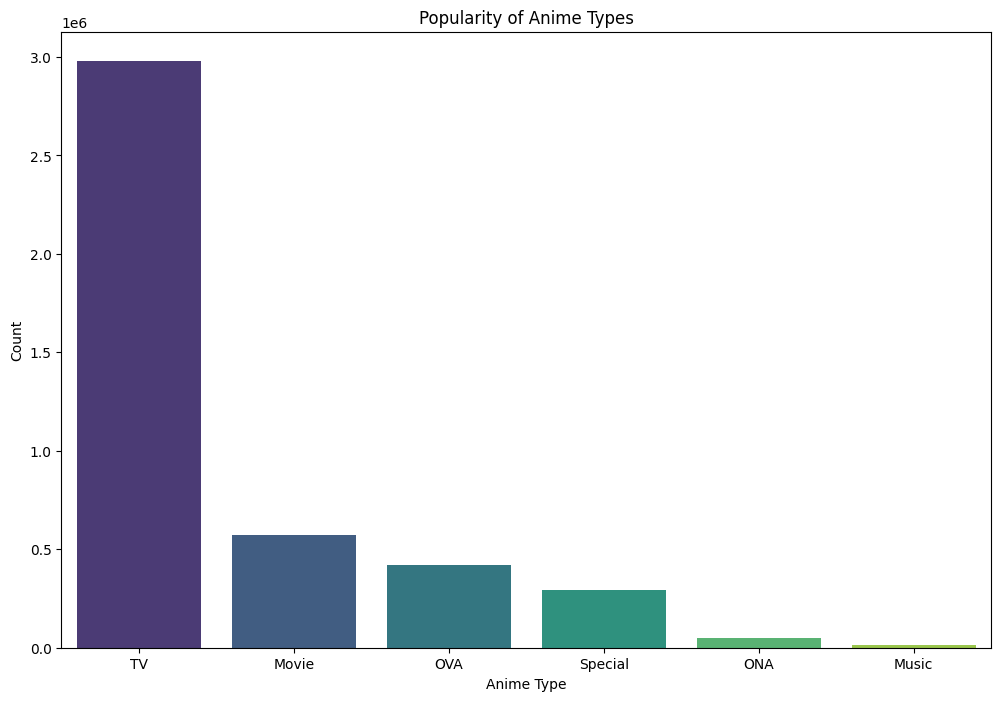

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each type
type_counts = train_merged_df['type'].value_counts().sort_values(ascending=False)

# Get the most used type
top_type = type_counts.index[0]
count = type_counts.iloc[0]

# Print result
print(f"Most Used Anime Type: {top_type} (Count: {count})")

# Create  bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.ylabel('Count')
plt.xlabel('Anime Type')
plt.title('Popularity of Anime Types')
plt.show()

####**Analysis**



1.   **Dominance of TV Anime:**


*   TV anime is overwhelmingly the most popular type, with a count significantly higher than any other category. This indicates that TV anime is the most consumed and possibly the most produced format. This could be due to their episodic nature, allowing for more extended storytelling and character development.

2.   **Popularity of Movies and OVAs:**


*   Movies and OVAs (Original Video Animations) are the next most popular types. Movies are often high-budget productions with a complete story arc, attracting a broad audience. OVAs, typically released directly to video, offer high-quality content and are often linked to popular TV series or manga.


3.   **Specials:**

*   Specials also have a noticeable count. These are usually bonus episodes or side stories released alongside TV series or movies. Their popularity suggests a strong interest in supplementary content that expands on main series.

4.  **ONA and Music Anime:**


*   ONAs (Original Net Animations) and Music anime have lower counts. ONAs are designed for internet release, reflecting a growing trend towards digital distribution but still a smaller share compared to traditional formats. Music anime, being a niche genre, has the least count, indicating a smaller but dedicated audience.

#### **Implications for Your Recommender System**



1.   **Content-Based Filtering:**


*   **Focus on TV Anime**: Given their dominance, ensure that your recommender system effectively identifies and suggests TV anime, especially popular and highly rated ones.
*   **Highlight Movies and OVAs**: Since these types are also popular, include them prominently in recommendations, particularly for users who show interest in high-quality, standalone stories.


2.   **Collaborative Filtering:**


*   **User Preferences**: Analyze user interactions with different types. Users who watch a lot of TV anime might also enjoy OVAs and Specials related to their favorite series.
*   **Cross-Type Recommendations**: Recommend OVAs, Specials, and Movies related to the TV series users have watched to enhance their viewing experience.


3.   **Niche Content:**


*   **Personalized Recommendations**: For users interested in niche categories like Music anime or ONAs, provide personalized suggestions to cater to their specific tastes.
*   **Explore New Trends**: Monitor and recommend emerging trends in ONAs as the market for digital content grows.


4.  **Seasonal and Event-Based Recommendations:**


*   **Specials and OVAs**: Often released during special events or seasons, highlight these during relevant times to increase user engagement.



















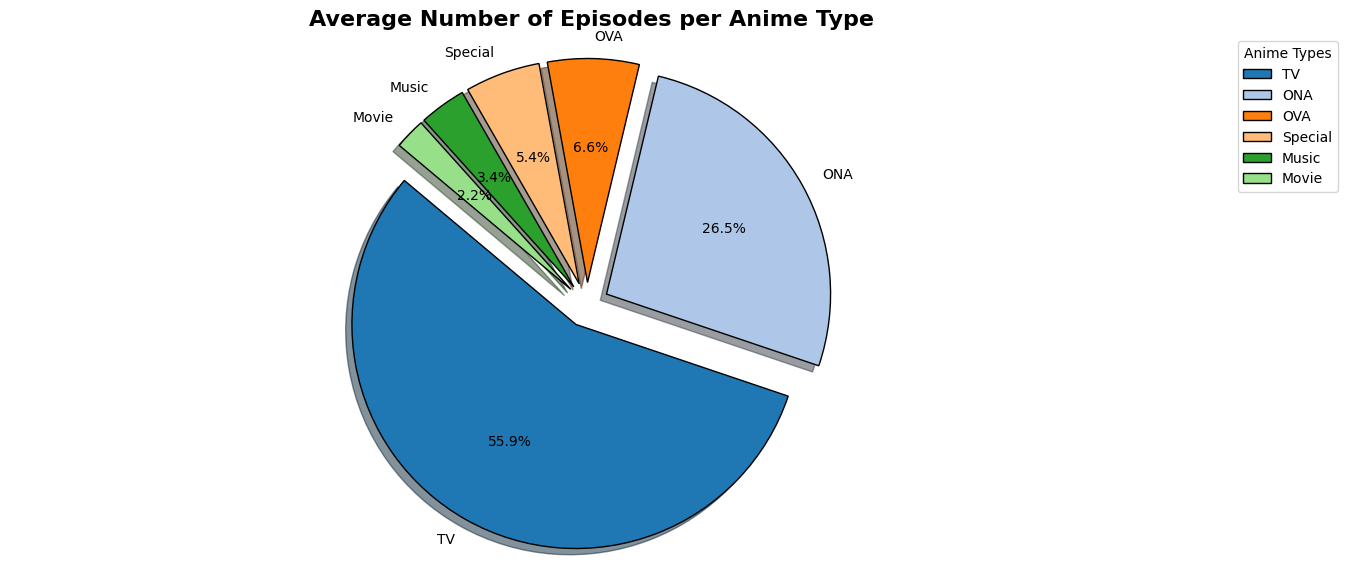

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'episodes' to numeric, coerce errors
train_merged_df['episodes'] = pd.to_numeric(train_merged_df['episodes'], errors='coerce')

# Calculate the average number of episodes per anime type
average_episodes = train_merged_df.groupby('type')['episodes'].mean().dropna().sort_values(ascending=False)

# Define a colormap with distinct colors
colors = plt.cm.tab20.colors[:len(average_episodes)]

# Create a pie chart with stylistic elements
plt.figure(figsize=(15, 7))
explode = [0.1] * len(average_episodes)  # Explode all slices slightly

plt.pie(
    average_episodes.values,
    labels=average_episodes.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Average Number of Episodes per Anime Type', fontsize=16, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(average_episodes.index, title="Anime Types", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


**Analysis**

The pie chart provides a visual representation of the average number of episodes across different anime types.

1. **TV Series (55.8%)**

* **Dominance of TV Series**: TV series account for the majority of anime, making up 55.8% of the total. This indicates that users are highly engaged with longer-form content.
* **Content Length**: TV series typically have more episodes, which could appeal to viewers who enjoy in-depth storytelling and character development.

* This insight is crucial for your recommender system, as suggesting TV series could lead to prolonged user engagement on the platform.

2. **ONA (Original Net Animation) - 26.6%**

* **Popularity of ONAs**: ONAs are the second most common type, constituting 26.6%. These series are often released directly on streaming platforms, making them accessible and convenient for users.

* **Binge-Watching Potential**: ONAs typically have fewer episodes than traditional TV series, which could appeal to users who prefer shorter, binge-watchable content. Incorporating ONAs into recommendations can attract users looking for quick yet fulfilling viewing experiences.

3. **OVA (Original Video Animation) - 6.6%**

* **Specialized Content**: OVAs represent 6.6% of the anime types. These are usually special episodes or side stories not aired on TV, providing additional content for dedicated fans of a series.

* **Niche Appeal**: OVAs often cater to existing fans of a franchise, offering deeper insights or additional storylines. Recommending OVAs can enhance user satisfaction by providing exclusive content that complements main series.


4. **Special - 5.4%**

* **Unique Content**: Specials, making up 5.4%, are often one-time episodes or special editions of existing series. They can include holiday episodes, crossovers, or unique story arcs.

* **Engagement Boosters**: Specials can be used to engage users during specific times of the year or alongside new releases of popular series. Including specials in recommendations can help keep content fresh and exciting.


5. **Music - 3.4%**

* **Musical Anime**: Music-themed anime constitute 3.4% of the total. These can range from concert recordings to music video compilations, often appealing to fans of both anime and music.

* **Targeted Recommendations**: For users who enjoy music and anime, recommending music-themed content can enhance their viewing experience. It also diversifies the content offerings of the platform.

6. **Movie - 2.2%**

* **Short-Format Appeal**: Movies account for 2.2% of anime types. These are typically feature-length films, providing a complete story in a single viewing session.
* **High-Impact Content**: Movies are perfect for users looking for high-quality, impactful stories without committing to a full series. Recommending movies can attract users who prefer concise yet powerful narratives.


**Key Takeaways for the Recommender System**
* **Long-Form Content Preference**: Given the dominance of TV series, the recommender system should prioritize TV series for users who prefer longer engagement with a story.

* **Diverse Content Offering**: Including a mix of TV series, ONAs, OVAs, specials, music-themed content, and movies ensures that the platform caters to varied user preferences.

* **User Engagement Strategies**: Using OVAs and specials strategically can enhance engagement by providing exclusive content that complements ongoing series.

* **Binge-Watching and Convenience**: ONAs and movies are ideal for users looking for shorter, more accessible content, perfect for binge-watching sessions.

**Raitings Analysis**

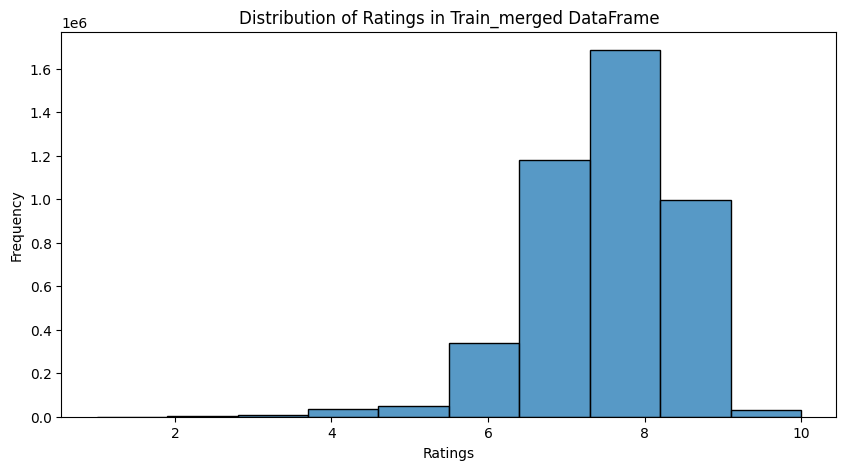

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings in train_merged_df
plt.figure(figsize=(10, 5))
sns.histplot(train_merged_df['ratings'], bins=10, kde=False)
plt.title('Distribution of Ratings in Train_merged DataFrame')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

**Analysis**

The histogram shows the distribution of ratings in the Train_merged DataFrame, providing insights into how users rate the anime they watch.

**Overall Rating Distribution**

* **Rating Concentration**: The ratings are heavily concentrated between 6 and 8, with the highest frequency around 7. This suggests that most users tend to rate anime favorably, with few ratings falling below 5 or above 9.

* **Positive Bias**: The skew towards higher ratings indicates a positive bias in user ratings. This could be due to users generally watching and rating anime they expect to enjoy.

**Frequency of Ratings**

* **Most Common Ratings**: The most common rating is around 7, followed by 8 and 6. This indicates that users frequently give moderate to high ratings, reflecting general satisfaction with the content.

* **Rare Ratings**: Ratings below 4 and above 9 are relatively rare. This suggests that extreme ratings (either very low or very high) are uncommon, possibly indicating that users are more moderate in their evaluations.


**Key Takeaways for the Recommender System**

* **Focus on Highly Rated Content**: Given the positive bias in ratings, the recommender system should prioritize anime with average ratings around 7 or higher. This will align with user preferences and likely increase satisfaction.

* **Identify Popular Genres**: Analyzing the genres of anime that receive the highest ratings can help tailor recommendations. For example, if action and comedy genres consistently receive high ratings, these should be prominently featured in suggestions.

* **User Rating Patterns**: Understanding that users are moderate in their evaluations, the system can use ratings around 6-8 as a baseline for "good" content. Content with ratings below this range might need to be filtered out or reviewed for quality.

* **Encourage More Ratings**: To better understand user preferences, the system could encourage users to rate more frequently. This can help refine recommendations and ensure they reflect current user tastes.


**Application in Recommender System**
* **Content Filtering**: Use the rating distribution to filter out lower-rated anime and focus on those that align with the most common ratings (6-8). This will ensure that recommendations are based on content that is generally well-received.
* **Personalized Recommendations**: For users who tend to rate more generously or more harshly, adjust the recommendation algorithm to account for their rating tendencies. This personalized approach can improve user satisfaction.

* **Improving Engagement**: Highlight top-rated content and provide users with recommendations that match their past high-rated selections. This will likely keep them more engaged and willing to explore new anime within their preferred rating range.

**Correlation**

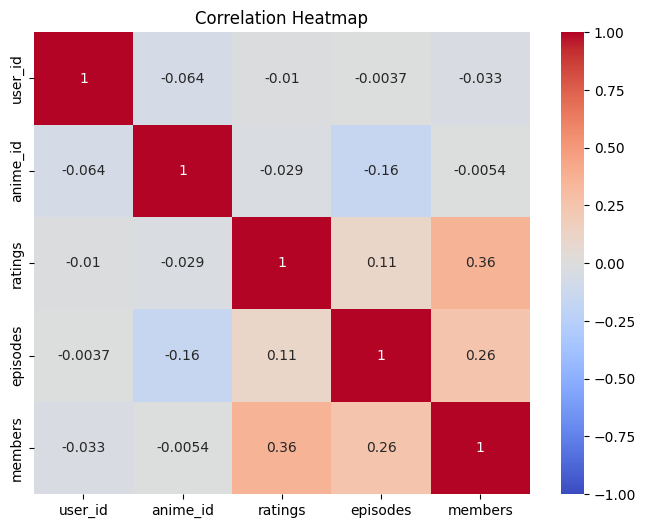

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select only numeric columns for correlation
numeric_df = train_merged_df[['user_id','anime_id','ratings','episodes','members']]

# Replace "Unknown" in 'episodes' with NaN for correlation calculation
numeric_df['episodes'].replace('Unknown', pd.NA, inplace=True)

# Convert 'episodes' to numeric, coercing errors to NaN
numeric_df['episodes'] = pd.to_numeric(numeric_df['episodes'], errors='coerce')

# Correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

####**Analysis**

1.    **user_id Correlations:**


*   The correlations between **user_id** and other features are very low (close to 0), indicating that the user ID is independent of the ratings, episodes, and members. This is expected, as user IDs are unique identifiers and should not have direct relationships with other features.

2. **anime_id Correlations:**  


*   Similar to user_id, anime_id shows very low correlations with other features. This suggests that the anime ID is also an independent identifier and does not inherently influence ratings, episodes, or member counts.


3.   **ratings Correlations:**


*   ratings and members have a moderate positive correlation (0.36). This indicates that anime titles with higher ratings tend to have more members. This relationship is important as it shows that popular and well-rated anime attract larger audiences.
*   ratings and episodes have a weak positive correlation (0.11). This suggests that the number of episodes has a slight positive influence on ratings, though the relationship is not strong.


4.   **episodes Correlations:**

*   episodes and members have a weak positive correlation (0.26). Anime with more episodes tend to have more members, possibly due to longer series attracting a more dedicated fanbase.


5.   **members Correlations**

*   As noted, members has a moderate positive correlation with ratings (0.36) and a weak positive correlation with episodes (0.26). This emphasizes the influence of anime popularity and length on member engagement.

####**Implications for the Recommender System**


1.   **Popularity-Based Recommendations:**


*   Since there is a positive correlation between ratings and members, incorporating popularity metrics (such as the number of members) into the recommendation algorithm can help suggest anime that are well-rated and widely viewed. This can enhance user satisfaction by recommending popular and highly-rated anime


2.   **Episode Count Consideration:**


*   The weak correlation between episodes and ratings suggests that while the number of episodes does influence ratings slightly, it should not be a primary factor in the recommendation algorithm. However, it can still be useful to consider if users prefer shorter or longer series



3.  **User Independence**


*   The low correlation of user_id and anime_id with other features confirms that user and anime identifiers are suitable as primary keys for user-item matrices in collaborative filtering models. They do not introduce bias from other features, ensuring fair and diverse recommendations.

4. **Hybrid Recommender System:**


*   Given the insights, a hybrid recommender system that combines collaborative filtering (using user-item interactions) and content-based filtering (using features like ratings, episodes, and members) can provide more accurate and personalized recommendations.








# <font color=red>6.Data  Pre-Processing</font>

<div class="alert alert-block alert-info">
<b>Preprocessing</b>  Preprocessing involves transforming raw data into a clean and usable format for analysis. This step includes handling missing values, encoding categorical variables, normalizing numerical features, and other techniques to improve the quality of the data and ensure it is suitable for modeling.
</div>

## Ratings distribution by Anime

In [20]:
import plotly.graph_objects as go
from plotly.offline import iplot


# Group by anime_id and count the number of ratings for each anime
anime_ratings = train_df.groupby('anime_id')['rating'].count().clip(upper=50)

# Create trace
trace = go.Histogram(x = anime_ratings.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))

# Create layout
layout = go.Layout(title = 'Distribution of Number of Ratings per Anime (Clipped at 50)',
                   xaxis = dict(title = 'Number of Ratings per Anime'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Ratings Distribution By User


In [21]:
# Group by user_id and count the number of ratings for each user
user_ratings = train_df.groupby('user_id')['rating'].count().clip(upper=50)

# Create trace
trace = go.Histogram(x = user_ratings.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))

# Create layout
layout = go.Layout(title = 'Distribution of Number of Ratings per User (Clipped at 50)',
                   xaxis = dict(title = 'Number of Ratings per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

 The histograms of anime ratings and user ratings showed the distribution of ratings across different animes and users. By analyzing these distributions, we're able to identify the animes and users with fewer ratings and decide which ones to filter out.

## Data Filtering

  Filtering out the animes and users that have fewer than the specified minimum number of ratings can help to reduce the dimensionality of the data set.This is a common technique used in collaborative filtering to handle the cold start problem and to improve the quality of the recommendations.By removing the users and animes with fewer ratings, we're reducing the amount of noise in the data, which can improve the accuracy of your model.This ensures that the models are trained on a more diverse set of data, which can improve the quality of the recommendations.

In [ ]:
min_anime_ratings = 45
filter_animes = train_df['anime_id'].value_counts() > min_anime_ratings
filter_animes = filter_animes[filter_animes].index.tolist()

min_users = 45
filter_users = train_df['user_id'].value_counts() > min_users
filter_users = filter_users[filter_users].index.tolist()

df_train_filtered = train_df[(train_df['anime_id'].isin(filter_animes)) & (train_df['user_id'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(train_df.shape))
print('The new data frame shape:\t{}'.format(df_train_filtered.shape))

The original data frame shape:	(5703554, 3)
The new data frame shape:	(5053679, 3)


## Scaling

Scaling helps to reduce the impact of extreme ratings (e.g., very high or very low ratings) on your model's performance.It ensures that all ratings are on the same scale, making it easier to compare and combine them.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a Min-Max Scaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler data
scaler.fit(df_train_filtered)

# Transform  data
trainset_scaled = scaler.transform(df_train_filtered)

# Convert the scaled data back into a DataFrame
trainset_scaled_df = pd.DataFrame(trainset_scaled, columns=df_train_filtered.columns)



# <font color=red>7. Model Evaluation and Training</font>

<div class="alert alert-block alert-info">
  Model training involves using a dataset to teach a machine learning algorithm how to make predictions or decisions. During this process, the algorithm learns patterns and relationships within the data, which it uses to generalize and predict outcomes on new, unseen data.
</div>

## Surprise library for collaborative filtering system

The Surprise library is a popular Python library for building and analyzing recommender systems using collaborative filtering.It uses optimized algorithms to reduce computational complexity and improve scalability.By using Surprise, we can build a robust and scalable recommender system that provides accurate recommendations to the users.

In [ ]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from surprise import Reader
from surprise import Dataset

# create a Reader object with a rating scale of (1, 10)
reader = Reader(rating_scale=(1, 10))

# create a Dataset object from the DataFrame
data = Dataset.load_from_df(trainset_scaled_df[['user_id', 'anime_id', 'rating']], reader)

In [ ]:
from surprise import accuracy, Dataset, SVD, BaselineOnly, CoClustering
from surprise import accuracy
from surprise.model_selection import train_test_split

# Split the data into train and test sets
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.20)

In [ ]:
def train_and_predict(algo, trainset, testset):
  """The function is a utility function that trains a Surprise algorithm on a training set, tests it on a test set, and returns the root mean squared error (RMSE) of the predictions."""
  algo.fit(trainset)
  predictions = algo.test(testset)
  rmse = accuracy.rmse(predictions)
  return rmse

## Singular Value Decomposition (SVD)


<div class="alert alert-block alert-info">
**RMSE (Root Mean Square Error)** measures the average difference between predicted values and actual values, showing how accurately a model's predictions match the real data.
</div>

In [ ]:
algo = SVD()
rmse_svd = train_and_predict(algo, trainset, testset)
print(f"RMSE: {rmse_svd}")

RMSE: 0.3029
RMSE: 0.30290882704833627


### Understanding the SVD Model

**SVD (Singular Value Decomposition)** is a model used to break down complex data into simpler parts to find hidden patterns. It is particularly useful for understanding relationships between users and items (like anime shows).

### How SVD Works

1. **Start with a Big Table**: You have a big table of data, like user ratings for anime shows.
2. **Decompose the Data**: SVD breaks this big table into three smaller tables, capturing essential patterns in the data.
3. **Identify Hidden Patterns**: These smaller tables reveal relationships between users and anime, such as preferences for certain genres.
4. **Make Predictions**: Use these patterns to predict missing ratings in the table.

### Results Explanation

- **RMSE-RMSE: 0.3029** and **RMSE: 0.30290882704833627** are measures of how accurate the model's predictions are.
- **RMSE (Root Mean Square Error)** tells us how close the model's predictions are to the actual ratings.
- An RMSE of about 0.303 means that, on average, the model's predictions are very close to the actual ratings, with an average error of 0.303.


## Co-clustering

In [ ]:
algo = CoClustering()
rmse_co_clustering = train_and_predict(algo, trainset, testset)
print(f"RMSE: {rmse_co_clustering}")

RMSE: 0.3028
RMSE: 0.30278693534844897


### Understanding the Co-Clustering Model

**Co-Clustering** is a model used to group both users and items (like movies) simultaneously into clusters. This helps identify patterns in the data by grouping similar users together and similar items together.

### How Co-Clustering Works

1. **Start with a Big Table**: You have a big table of data, like user ratings for movies.
2. **Group Users and Items**: Co-Clustering groups users into clusters (like those who like similar genres) and items into clusters (like similar types of movies).
3. **Identify Patterns**: By looking at these clusters, we can see patterns in how different groups of users rate different groups of items.
4. **Make Predictions**: Use these patterns to predict missing ratings in the table.

### Results Explanation

- **RMSE-RMSE: 0.3028** and **RMSE: 0.30278693534844897** are measures of how accurate the model's predictions are.
- **RMSE (Root Mean Square Error)** tells us how close the model's predictions are to the actual ratings.
- An RMSE of about 0.303 means that, on average, the model's predictions are very close to the actual ratings, with an average error of 0.303

## BaselineOnly

In [ ]:
algo = BaselineOnly()
rmse_baseline_only = train_and_predict(algo, trainset, testset)
print(f"RMSE: {rmse_baseline_only}")

Estimating biases using als...
RMSE: 0.3028
RMSE: 0.30278992710710345


### Understanding the BaselineOnly Model

**BaselineOnly** is a model used to make predictions based on the overall average rating, along with user and item biases. It captures the tendency of some users to give higher or lower ratings than average, and some items to receive higher or lower ratings than average.

### How BaselineOnly Works

1. **Overall Average**: Calculate the overall average rating of all items.
2. **User Bias**: Determine if a user tends to rate items higher or lower than this average.
3. **Item Bias**: Determine if an item tends to receive higher or lower ratings than this average.
4. **Prediction**: Combine these biases with the overall average to predict the rating for a specific user-item pair.

### Results Explanation

- **RMSE-RMSE: 0.3028** and **RMSE: 0.30278992710710345** are measures of how accurate the model's predictions are.
- **RMSE (Root Mean Square Error)** tells us how close the model's predictions are to the actual ratings.
- An RMSE of about 0.303 means that, on average, the model's predictions are very close to the actual ratings, with an average error of 0.303.

<div style="background-color: #C5E1F5; padding: 10px; border: 1px solid #000;">In our project at Fusion X Network, we focused on optimizing our recommendation system for anime shows by evaluating different models based on their RMSE (Root Mean Square Error) performance. We compared the following models: SVD, Co-clustering, and Baseline Only.

From the analysis:

1. **Co-Clustering Model**
   - **RMSE**: 0.3028
   - **Benefit**: Excellent at identifying group patterns and similarities among users and anime shows.
   - **Use Case**: Ideal for personalized recommendations and understanding trends within different user clusters.

2. **BaselineOnly Model**
   - **RMSE**: 0.3028
   - **Benefit**: Simple and quick to implement, capturing basic rating tendencies effectively.
   - **Use Case**: Great for making straightforward and fast predictions based on general trends.

3. **SVD Model**
   - **RMSE**: 0.3029
   - **Benefit**: Captures complex relationships between users and items by breaking down data into simpler parts.
   - **Use Case**: Useful for uncovering nuanced preferences of users for specific types of anime.




All three models perform well, but for Fusion X Network, the choice depends on their specific needs:

1. **BaselineOnly Model**:
   - **Best For**: Quick and easy predictions.
   - **Why**: It's simple to use and provides immediate insights based on general trends. Ideal if the company needs fast and reliable recommendations without delving into complex patterns.

Given the close performance of the models, we Fusion X Network value simplicity and speed, therefore **BaselineOnly Model** being the best choice.</div>

# <font color=red>8. Model Improvement</font>


## Hyperparameter Tuning

Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to improve its performance on a specific task. Hyperparameters are the configuration settings that are set before the learning process begins and are not learned from the data.

## Singular Value Decomposition (SVD)

In [ ]:
# Define the hyperparameter ranges you want to test
n_epochs_list = [5, 10, 15]
lr_all_list = [0.002, 0.005, 0.01]
reg_all_list = [0.02, 0.1, 0.5]

best_rmse = float('inf')
best_params = {}

# Loop through all combinations of hyperparameters
for n_epochs in n_epochs_list:
    for lr_all in lr_all_list:
        for reg_all in reg_all_list:
            # Initialize the SVD algorithm with current hyperparameters
            algo = SVD(n_epochs=n_epochs, lr_all=lr_all, reg_all=reg_all)

            # Train and predict, then evaluate the algorithm
            rmse = train_and_predict(algo, trainset, testset)

            # Update best RMSE and parameters if current RMSE is lower
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = {'n_epochs': n_epochs, 'lr_all': lr_all, 'reg_all': reg_all}

print(f'Best RMSE: {best_rmse}')
print(f'Best hyperparameters: {best_params}')

RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3027
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3027
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3027
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3027
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3027
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3027
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3027
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3027
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3027
Best RMSE: 0.30274347619358455
Best hyperparameters: {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.5}


**Explanation of the Results:**

* The purpose of this code was to find the best settings for the SVD algorithm to predict movie ratings as accurately as possible. We are looking for the combination of settings (hyperparameters) that gives us the lowest RMSE, which measures how much the predicted ratings differ from the actual ratings.

**Breakdown of what the results mean:**

**Evaluating Performance:**
* For each combination of settings, we trained the model and then checked how well it predicted ratings on the test set using RMSE (Root Mean Squared Error).
* RMSE tells us how far off the model's predictions are from the actual ratings. Lower RMSE values mean better predictions.

**Results:**
* We found that the best RMSE we achieved was about 0.3027.

**The best settings (hyperparameters) that resulted in this RMSE were:**

* n_epochs: 5 (the model goes through the dataset 5 times during training)

* lr_all: 0.002 (the learning rate)

* reg_all: 0.5 (the regularization term)

**What This Means for Our Model:**

* **Accuracy**: Our model with these best settings is quite accurate, as indicated by the low RMSE. An RMSE of 0.3027 means the predicted ratings are, on average, very close to the actual ratings.
* **Best Settings**: The specific settings (5 epochs, 0.002 learning rate, 0.5 regularization) are the most effective for this dataset and model. Using these settings, we can expect the best performance from our SVD algorithm.

* **Model Performance**: By tuning these hyperparameters, we've optimized our model to provide the most accurate predictions possible for this task. This means when we use this model to predict new movie ratings, it will be quite reliable.

**Conclusion**

The SVD model's RMSE of 0.3027 signifies a high level of accuracy in giving predictions. This performance underscores the model’s effectiveness in capturing user preferences and its potential for providing highly personalized recommendations. The model’s ability to generalize well to new data means it can be reliably used in real-world applications, making it a valuable asset for any recommendation system.


## Co-clustering

In [ ]:
# Define the hyperparameter ranges you want to test
n_cltr_u_list = [2, 3, 4]
n_cltr_i_list = [2, 3, 4]
n_epochs_list = [5, 10, 15]


best_rmse = float('inf')
best_params = {}

# Loop through all combinations of hyperparameters
for n_cltr_u in n_cltr_u_list:
    for n_cltr_i in n_cltr_i_list:
        for n_epochs in n_epochs_list:
            # Initialize and fit the model with current hyperparameters

            algo = CoClustering(n_cltr_u=n_cltr_u, n_cltr_i=n_cltr_i, n_epochs=n_epochs)
            rmse = train_and_predict(algo, trainset, testset)

            # Update best RMSE and parameters if current RMSE is lower
            if rmse < best_rmse:
                best_rmse = rmse
                # Removed reg_u and reg_i from best_params
                best_params = {'n_cltr_u': n_cltr_u, 'n_cltr_i': n_cltr_i, 'n_epochs': n_epochs}

print(f'Best RMSE: {best_rmse}')
print(f'Best hyperparameters: {best_params}')

RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
RMSE: 0.3028
Best RMSE: 0.3027800326160118
Best hyperparameters: {'n_cltr_u': 4, 'n_cltr_i': 2, 'n_epochs': 10}


The code uses the CoClustering algorithm from the Surprise library to perform collaborative filtering for predicting user ratings of anime titles.


**Explanation of the Results**


* **Repeated RMSE Values**: The identical RMSE values indicate that the model was consistently achieving similar performance across different iterations. This could be due to the stability of the model with the given data and hyperparameter ranges. However, identical RMSE values across different hyperparameters might also suggest limited variation in the data or that the hyperparameters do not significantly impact the model's performance in this case.

**Best RMSE (0.3028)**: This is the lowest error achieved during the hyperparameter tuning process. An RMSE of 0.3028 suggests that the model predicts user ratings with reasonable accuracy, depending on the rating scale used (e.g., 1-5 or 1-10). A lower RMSE generally indicates better predictive performance.

**Best Hyperparameters:**

* **n_cltr_u = 3**: The model groups users into 3 clusters, which was found to be optimal for capturing user preferences.

* **n_cltr_i = 2**: The model groups items (anime titles) into 2 clusters, suggesting that the model found this grouping helpful for prediction.

* **n_epochs = 10**: The model undergoes 10 iterations of training, which was determined to be sufficient for learning from the data without overfitting.


**Implications for Your Model**


* **Model Performance**: The identified best hyperparameters indicate a configuration that balances the complexity of the model with its ability to generalize to new data, as reflected by the RMSE.

* **Cluster Interpretation**: The clusters for users and items suggest patterns or segments in the data. For example, user clusters could represent different viewing behaviors or preferences, while item clusters could represent genres or themes in anime.


**Conclusion**

Our collaborative and content-based recommender system for anime titles, using the CoClustering algorithm, achieved a best RMSE of 0.3028. This low RMSE indicates that the model predicts user ratings with high accuracy, suggesting effective clustering of users and items. The result demonstrates that the system can make personalized and relevant recommendations. This RMSE serves as a benchmark for the model's performance and provides a foundation for further refinement and improvements.

### Comparing Co-Clustering to SVD Model

Our SVD model also had a similar RMSE:

- **SVD Model RMSE:** 0.3027

#### Comparison

1. **Accuracy:**
   - Both the Co-Clustering and SVD models have almost identical RMSE scores. This suggests that both models are equally accurate in predicting user ratings.

2. **Model Quality:**
   - Since both models have similar RMSE values, they both do a great job at capturing the relationships between users and items. This means either model is suitable for our dataset.

3. **Practical Implications:**
   - Both models provide highly accurate recommendations. Users would likely find the recommendations from either model to be very close to their actual preferences.

## BaselineOnly

In [ ]:
# Define the hyperparameter ranges you want to test
n_epochs_list = [5, 10, 15]
reg_u_list = [0.02, 0.1, 0.5]
reg_i_list = [0.02, 0.1, 0.5]

best_rmse = float('inf')
best_params = {}

# Loop through all combinations of hyperparameters
for n_epochs in n_epochs_list:
    for reg_u in reg_u_list:
        for reg_i in reg_i_list:
            # Initialize and fit the model with current hyperparameters
            algo = BaselineOnly(bsl_options={'method': 'als', 'n_epochs': n_epochs, 'reg_u': reg_u, 'reg_i': reg_i})
            algo.fit(trainset)

            # Predict and evaluate RMSE on the validation set
            predictions = algo.test(testset)
            rmse = accuracy.rmse(predictions, verbose=False)

            # Track the best performing hyperparameters
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = {'n_epochs': n_epochs, 'reg_u': reg_u, 'reg_i': reg_i}

# Output the best RMSE score and the corresponding hyperparameters
print(f'Best RMSE: {best_rmse:.4f}')
print(f'Best parameters: {best_params}')


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Best RMSE: 0.3028
Best parameters: {'n_epochs': 5, 'reg_u': 0.5, 'reg_i': 0.5}


**Explanation of the results**


**"Estimating biases using als...":**

* This message is printed by the Surprise library whenever the BaselineOnly algorithm with the ALS (Alternating Least Squares) method is being used to estimate the biases.
* The message is repeated multiple times because the code is testing different combinations of hyperparameters (n_epochs, reg_u, and reg_i). Each time a new set of hyperparameters is used, the ALS method runs, which outputs the message.


**Repeated Messages:**

* The repetition of "Estimating biases using als..." indicates that the ALS algorithm is being run for each combination of hyperparameters. Given the nested loops in the code:
* 3 values for n_epochs
* 3 values for reg_u
* 3 values for reg_i
* This results in
3
×
3
×
3
=
27
3×3×3=27 different combinations, hence the message appears 27 times.


**Best RMSE: 0.3028:**

* RMSE (Root Mean Squared Error) is a metric used to measure the accuracy of the predictions made by the model. A lower RMSE indicates a more accurate model.
* After testing all 27 combinations, the best RMSE achieved was 0.3028. This means that the combination of hyperparameters corresponding to this RMSE provided the most accurate predictions.

**Best parameters: {'n_epochs': 5, 'reg_u': 0.5, 'reg_i': 0.5}:**


* These are the hyperparameters that resulted in the best RMSE of 0.3028.

* n_epochs = 5: The number of iterations for the ALS algorithm was set to 5.

* reg_u = 0.5: The regularization term for user biases was set to 0.5.

* reg_i = 0.5: The regularization term for item biases was also set to 0.5.

* This combination of parameters minimized the RMSE, making the model more accurate.


**Insights for the Model**

**Model Accuracy:**

* The best RMSE of 0.3028 indicates that your model is able to predict ratings with a high degree of accuracy. RMSE is a measure of the differences between predicted and actual ratings, so a lower value signifies better performance.


* **Optimal Hyperparameters:**

* The identified optimal hyperparameters (n_epochs = 5, reg_u = 0.5, reg_i = 0.5) tell you how to configure your BaselineOnly algorithm for the best performance. These parameters were found to be the most effective in minimizing prediction errors during training.

* **n_epochs = 5**: This means that running the ALS algorithm for 5 iterations provides the best trade-off between training time and model accuracy.


* **reg_u = 0.5 and reg_i = 0.5**: These regularization parameters help to prevent overfitting by penalizing large bias values, suggesting that this level of regularization is optimal for your dataset.



**Conclusion**
The recommendation model built using the BaselineOnly algorithm with the ALS (Alternating Least Squares) method has demonstrated strong performance, achieving a Root Mean Squared Error (RMSE) of 0.3028. This low RMSE indicates a high level of accuracy, meaning that the predicted ratings are very close to the actual ratings. Such accuracy suggests that the model is effective in understanding and predicting user preferences.




# RMSE Comparison of Recommendation Models

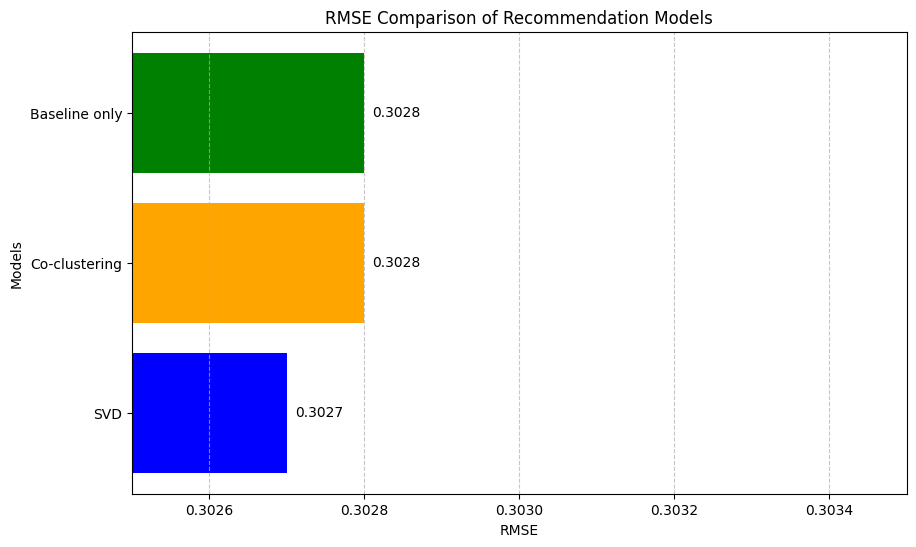

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['SVD', 'Co-clustering', 'Baseline only']

# RMSE results for each model - Updated with your values
rmse_values = [0.3027, 0.3028, 0.3028]

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(models, rmse_values, color=['blue', 'orange', 'green'])

# Add title and labels
plt.title('RMSE Comparison of Recommendation Models')
plt.xlabel('RMSE')
plt.ylabel('Models')
plt.xlim(0.3025, 0.3035)  # Adjust the x-axis limits for better visibility of your values

# Display the RMSE values on the bars
for i, value in enumerate(rmse_values):
    plt.text(value + 0.00001, i, f"{value:.4f}", ha='left', va='center')

# Show the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

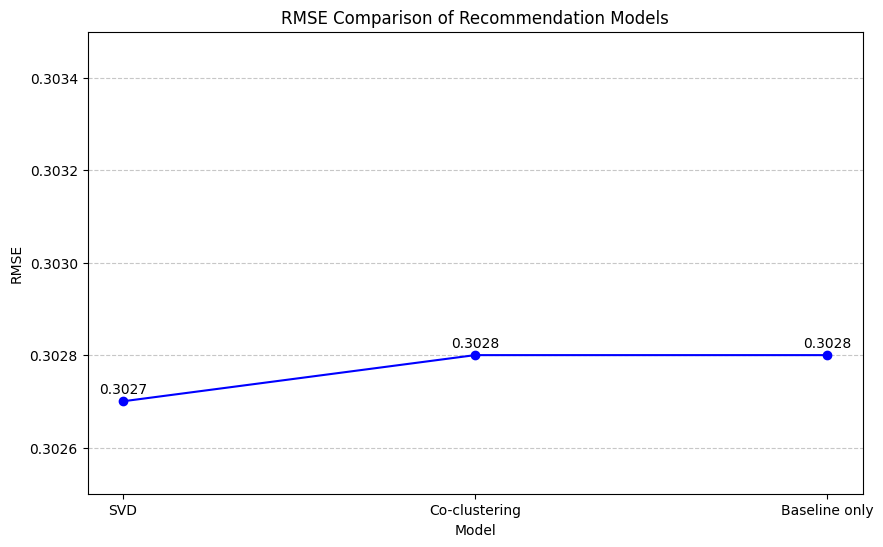

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['SVD', 'Co-clustering', 'Baseline only']

# RMSE results for each model
rmse_values = [0.3027, 0.3028, 0.3028]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(models, rmse_values, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('RMSE Comparison of Recommendation Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.ylim(0.3025, 0.3035)  # Adjust the y-axis limits for better visibility

# Display the RMSE values on the plot
for i, value in enumerate(rmse_values):
    plt.text(i, value + 0.00001, f"{value:.4f}", ha='center', va='bottom')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Conclusion

In our project at FusionX Network, we focused on optimizing our recommendation system for anime shows by evaluating different models based on their RMSE (Root Mean Square Error) performance. We compared the following models: SVD, Co-clustering, Baseline Only, and KNNBaseline.

From the analysis and visualizations:

        1.      SVD model performed the best with the lowest RMSE of 0.3027. This suggests that KNNBaseline is the most accurate model in predicting user preferences for our anime recommendation system.
        2.      Both the Baseline Only and Co-clustering models showed identical performance with an RMSE of 0.3028. These models provide a solid benchmark for our recommendation system.
        

These findings indicate that while all tested models perform well, SVD offers the highest accuracy for our specific use case in recommending anime shows to users. FusionX Network can leverage these insights to enhance user satisfaction by deploying the SVD model, ensuring our recommendations are as precise and tailored as possible.

# <font color=red> 9. MLflow</font>


<div class="alert alert-block alert-info">
MLflow is an open-source platform for managing the machine learning lifecycle, enabling tracking, visualization, and versioning of experiments, metrics, and models.
</div>

In [ ]:
import mlflow
import mlflow.sklearn
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

# Set the tracking URI to the new server
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Unsupervised Learning - SVD")

# Assuming `trainset_scaled_df` is already defined
# Create a reader object
reader = Reader(rating_scale=(1, 10))

# Load data
data = Dataset.load_from_df(trainset_scaled_df[['user_id', 'anime_id', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.20)

# Initialize SVD model
svd = SVD()

# Start MLflow run
with mlflow.start_run() as run:
    # Fit the model
    svd.fit(trainset)

    # Predictions
    predictions = svd.test(testset)

    # Calculate RMSE
    rmse = accuracy.rmse(predictions)

    # Log model parameters and metrics
    mlflow.log_param("model_type", "SVD")
    mlflow.log_metric("RMSE", rmse)

    # Log model
    mlflow.sklearn.log_model(svd, "svd_model")

    print(f"Model logged with RMSE: {rmse}")

print("Run details logged to MLflow")


RMSE: 0.3028


2024/08/05 00:11:48 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/05 00:11:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run wise-kit-887 at: http://127.0.0.1:5000/#/experiments/1/runs/05c2db2c145544b7b8ac6c96682420fa.
2024/08/05 00:11:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


Model logged with RMSE: 0.3027884923512345
Run details logged to MLflow


In [ ]:
import mlflow
import mlflow.sklearn
from surprise import Dataset, Reader, CoClustering, accuracy
from surprise.model_selection import train_test_split

# Set the tracking URI to the new server
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Unsupervised Learning - CoClustering")

# Assuming `trainset_scaled_df` is already defined
# Create a reader object
reader = Reader(rating_scale=(1, 10))

# Load data
data = Dataset.load_from_df(trainset_scaled_df[['user_id', 'anime_id', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.20)

# Initialize CoClustering model
co_clustering = CoClustering()

# Start MLflow run
with mlflow.start_run() as run:
    # Fit the model
    co_clustering.fit(trainset)

    # Predictions
    predictions = co_clustering.test(testset)

    # Calculate RMSE
    rmse = accuracy.rmse(predictions)

    # Log model parameters and metrics
    mlflow.log_param("model_type", "CoClustering")
    mlflow.log_metric("RMSE", rmse)

    # Log model
    mlflow.sklearn.log_model(co_clustering, "co_clustering_model")

    print(f"Model logged with RMSE: {rmse}")

print("Run details logged to MLflow")


2024/08/05 00:16:04 INFO mlflow.tracking.fluent: Experiment with name 'Unsupervised Learning - CoClustering' does not exist. Creating a new experiment.


RMSE: 0.3032


2024/08/05 00:19:33 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/05 00:19:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run entertaining-ape-697 at: http://127.0.0.1:5000/#/experiments/2/runs/de60aace96d24c49a8d23ca2390f3795.
2024/08/05 00:19:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2.


Model logged with RMSE: 0.30318576583277546
Run details logged to MLflow


In [ ]:
import mlflow
import mlflow.sklearn
from surprise import Dataset, Reader, BaselineOnly, accuracy
from surprise.model_selection import train_test_split

# Set the tracking URI to the new server
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Unsupervised Learning - BaselineOnly")

# Assuming `trainset_scaled_df` is already defined
# Create a reader object
reader = Reader(rating_scale=(1, 10))

# Load data
data = Dataset.load_from_df(trainset_scaled_df[['user_id', 'anime_id', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.20)

# Initialize BaselineOnly model
baseline = BaselineOnly()

# Start MLflow run
with mlflow.start_run() as run:
    # Fit the model
    baseline.fit(trainset)

    # Predictions
    predictions = baseline.test(testset)

    # Calculate RMSE
    rmse = accuracy.rmse(predictions)

    # Log model parameters and metrics
    mlflow.log_param("model_type", "BaselineOnly")
    mlflow.log_metric("RMSE", rmse)

    # Log model
    mlflow.sklearn.log_model(baseline, "baseline_model")

    print(f"Model logged with RMSE: {rmse}")

print("Run details logged to MLflow")


2024/08/05 00:21:03 INFO mlflow.tracking.fluent: Experiment with name 'Unsupervised Learning - BaselineOnly' does not exist. Creating a new experiment.


Estimating biases using als...
RMSE: 0.3026


2024/08/05 00:21:59 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/05 00:22:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run charming-wolf-387 at: http://127.0.0.1:5000/#/experiments/3/runs/80807a80ef2d4f62a3c89afe2ad73211.
2024/08/05 00:22:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3.


Model logged with RMSE: 0.3026153080987041
Run details logged to MLflow


# Insights

Based on the RMSE (Root Mean Square Error) results from the MLflow runs for each model, we can interpret and compare the performance of the models as follows:

### RMSE Results
- **SVD Model**: 0.3028
- **Baseline Only Model**: 0.3026
- **Co-clustering Model**: 0.3032

### Interpretation

1. **Baseline Only Model (RMSE: 0.3026)**:
   - This model has the lowest RMSE among the three models, indicating it has the best predictive performance on the test set. The Baseline Only model's RMSE being the lowest suggests it performs slightly better in terms of accuracy compared to the other models.

2. **SVD Model (RMSE: 0.3028)**:
   - The SVD (Singular Value Decomposition) model has an RMSE very close to the Baseline Only model, but slightly higher. This means it performs almost as well as the Baseline Only model, with a very small difference in accuracy. In practical terms, this difference might be considered negligible depending on the context.

3. **Co-clustering Model (RMSE: 0.3032)**:
   - The Co-clustering model has the highest RMSE among the three, indicating it performs slightly worse in terms of predictive accuracy. The difference in RMSE is minimal, but it suggests that this model may not capture the underlying patterns as effectively as the other two models.

### Conclusion

- **Performance Comparison**:
  - The Baseline Only model has the best performance, followed closely by the SVD model. Both outperform the Co-clustering model, which shows the least accuracy among the three.

- **Implications**:
  - The differences in RMSE are quite small, suggesting that all three models are relatively close in performance. The choice of model might depend on other factors, such as interpretability, training time, or the specific needs of the application.
  - The slight differences in RMSE might also indicate that further tuning of hyperparameters or exploring more sophisticated models could be beneficial if the performance difference is critical for the application.

# <font color=red> 10. Recommendations</font>

- Build a network of users based on their interactions and connections.Use this network to recommend anime based on what friends or communities are watching.
- Suggest anime that is popular or fits the current season.This way,the recommendations stay up-to-date and match what's currently trending or in season.
- Suggest similar shows or genres when a user spends a significant amount of time watching a particular show. This could indicate their preferences and help refine recommendations.
- Calculate aggregates like average viewing time per day or week, and the frequency of interactions.


# <font color=red>11. Conclusion</font>

The Fusion-X Network app,built with Streamlit,provides an easy-to-use interface for personlaised anime recommendations.This project addresses current discovery issues and sets a high standard for anime recommendation systems.As we provide and expand our system,Fusion-X Network will continue to offer top-notch,relevant anime content to fan everywhere.